# import important library to use

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE


# Read Data

In [2]:
df = pd.read_csv(r'F:\CodSoft\creditcard\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

# Data Cleaning

In [4]:
# check null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.duplicated().sum()

1081

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(283726, 31)

# Exploratory Data Analysis (EDA) 

### Return some information about our column

In [9]:
columns = df.columns
columns# Exploratory Data Analysis (EDA) ### Return some information about our column

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

### Return some statistic information about our column

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


### the correlation between different features in the dataset

In [12]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


### Visual representation of the correlation between different features in the dataset

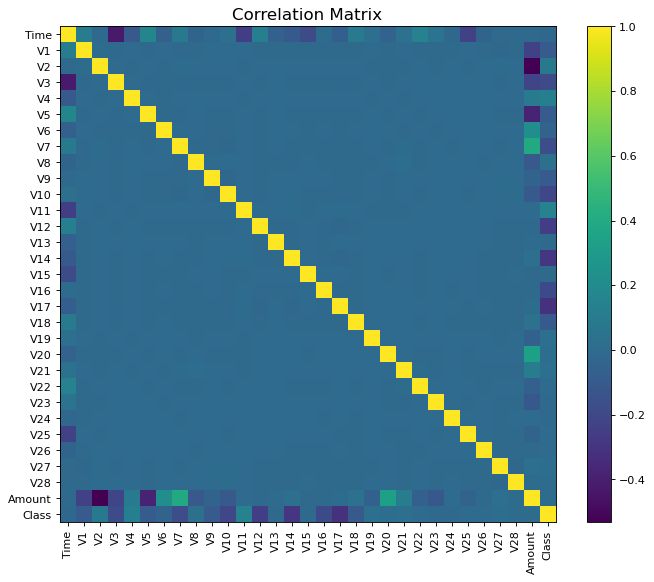

In [13]:
### Visual representation of the correlation between different features in the dataset
corr = df.corr()
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix', fontsize=15)
plt.show()

### Show distribution of values in each column of the dataset

<Figure size 2000x2000 with 0 Axes>

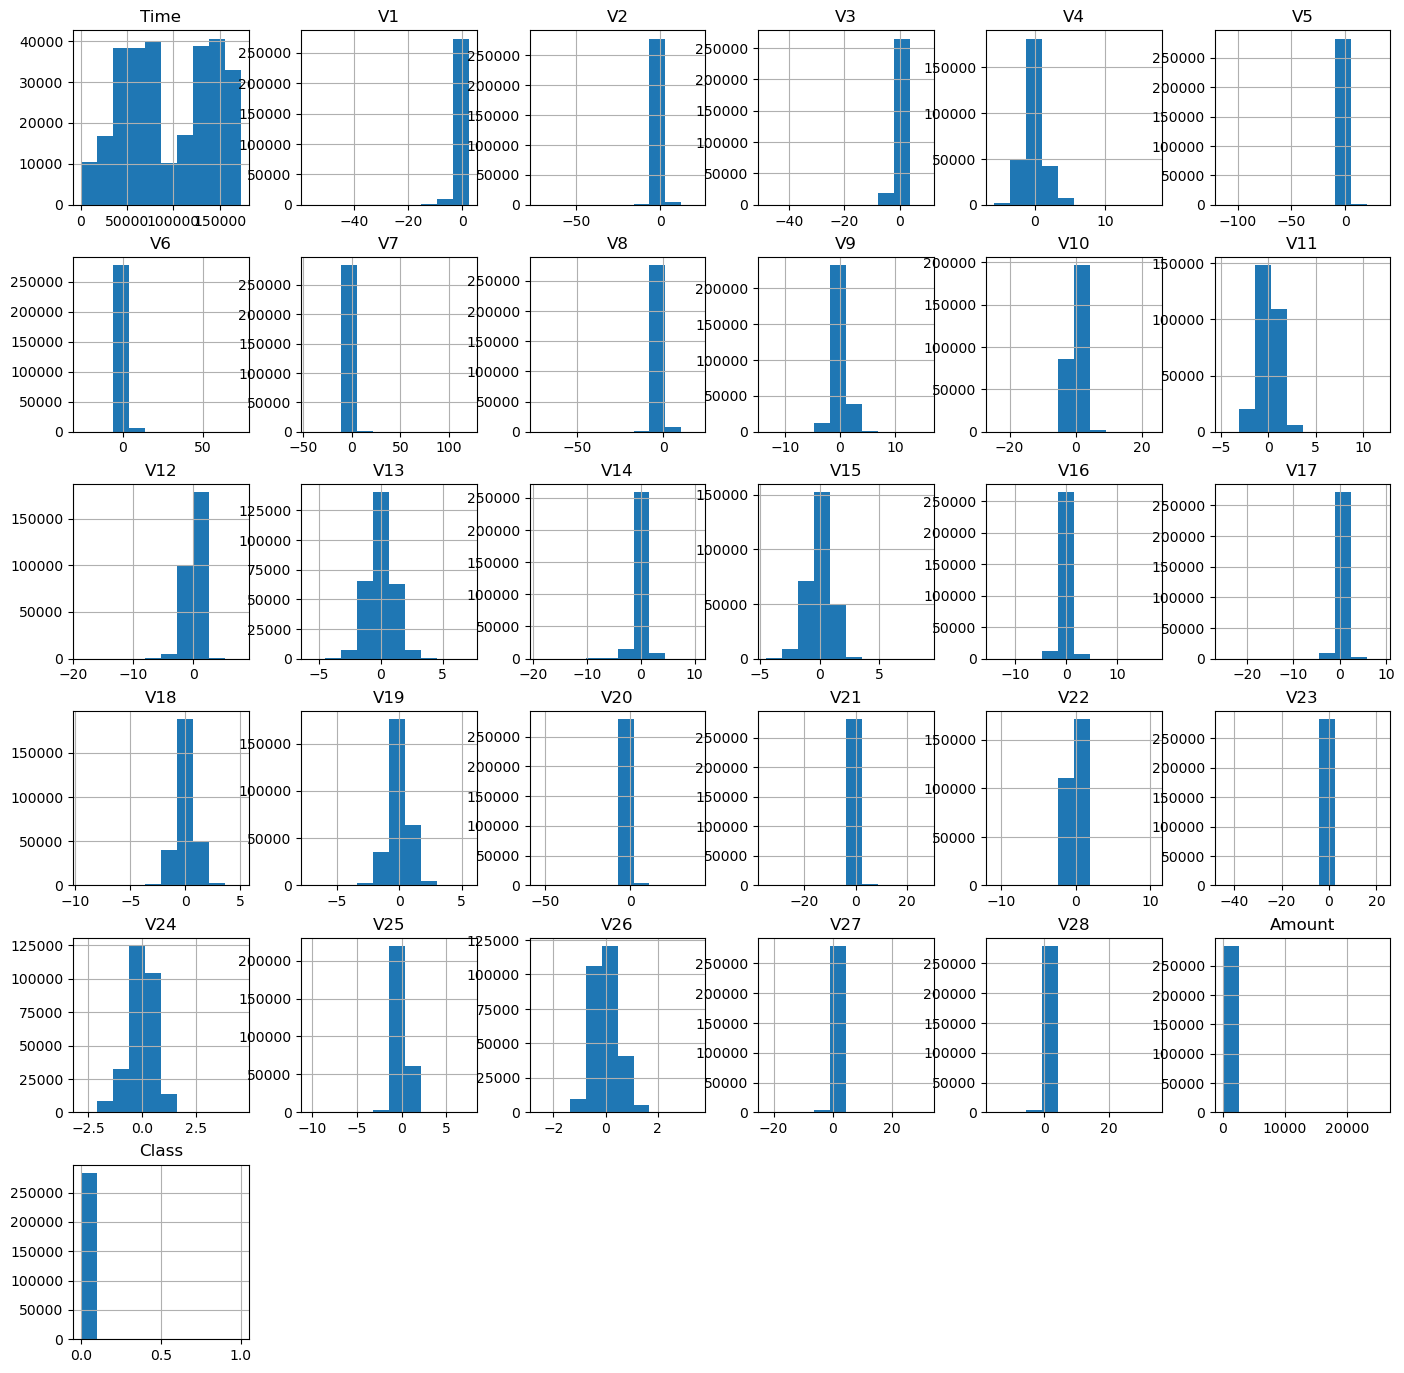

In [14]:
plt.figure(figsize=(20, 20))
df.hist(figsize=(17, 17))
plt.show()

### Show Distribution Plot of class

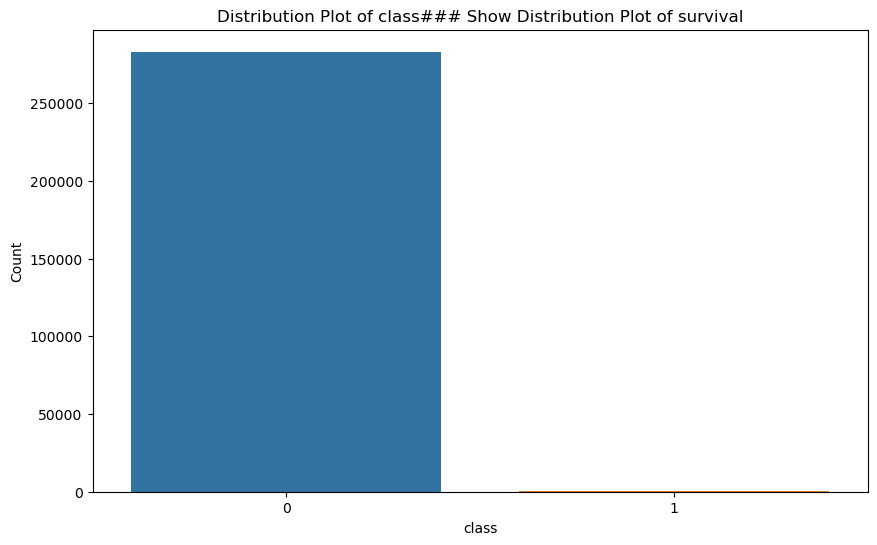

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution Plot of class### Show Distribution Plot of survival')### Show Distribution Plot of Letters
plt.xlabel('class')
plt.ylabel('Count')
plt.show()

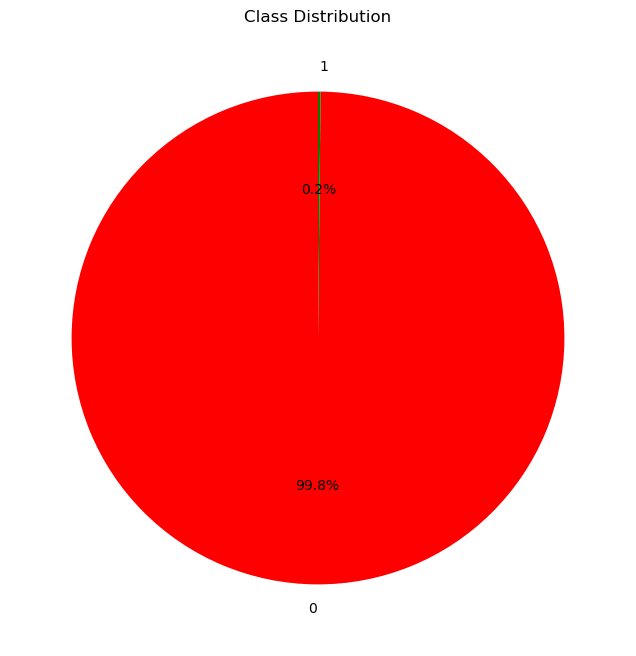

In [16]:
# Count the occurrences of each unique value in the 'Survived' column
class_counts = df['Class'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Class Distribution')
plt.show()

In [17]:
class_counts

Class
0    283253
1       473
Name: count, dtype: int64

# our data is imbalanced let's solve this problem

# Data Preprocessing

In [18]:
x = df.drop(columns=['Class'],axis=1) 
y = df['Class']

### Scale our Data

In [19]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x.shape

(283726, 30)

### Split our data to training and test sets

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print('trainig size',x_train.shape,y_train.shape)
print('test size',x_test.shape,y_test.shape)### Split our data to training and test sets

trainig size (226980, 30) (226980,)
test size (56746, 30) (56746,)


# oversampling technique to solve imbalanced data

In [21]:
sm = SMOTE(random_state=12 , sampling_strategy='auto')
x_train_resample,y_train_resample = sm.fit_resample(x_train,y_train)

### Our data is now balanced

In [22]:
y_train_resample.value_counts()

Class
0    226597
1    226597
Name: count, dtype: int64

# Logistic Regression 

### Build model 

In [23]:
LR = LogisticRegression(solver='liblinear').fit(x_train_resample,y_train_resample)
LR

LogisticRegression(solver='liblinear')

In [24]:
yhat_log = LR.predict(x_test)
yhat_log

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[9.85583480e-01, 1.44165203e-02],
       [9.99999975e-01, 2.52822419e-08],
       [9.98182158e-01, 1.81784226e-03],
       ...,
       [9.90038159e-01, 9.96184085e-03],
       [9.44219134e-01, 5.57808658e-02],
       [9.90917775e-01, 9.08222487e-03]])

# Evaluation

In [26]:
accuracy_logistic = metrics.accuracy_score(y_test ,yhat_log )
print('Accuracy : ',accuracy_logistic )

Accuracy :  0.9752757903640785


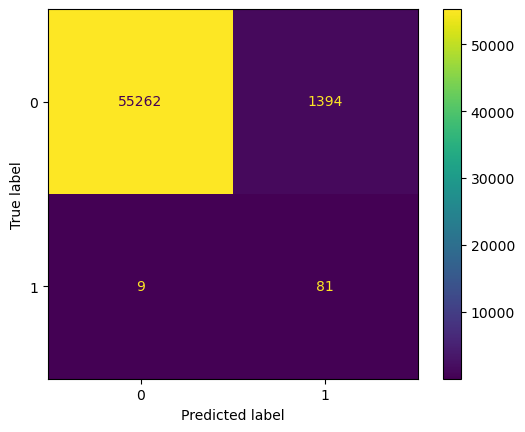

In [27]:
matrix = confusion_matrix(y_test, yhat_log)
dis = ConfusionMatrixDisplay(matrix)
dis.plot()
plt.show()

In [28]:
report_4 = classification_report(y_test ,yhat_log)
# Print the classification report
print(report_4)
f1_logistic = metrics.f1_score(y_test, yhat_log, average='weighted')
jaccard_logistic= jaccard_score(y_test, yhat_log,pos_label=0)
print("F1_score : ",f1_logistic)
print('jaccard_score',jaccard_logistic)
print('log_loss',log_loss(y_test, yhat_prob))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.05      0.90      0.10        90

    accuracy                           0.98     56746
   macro avg       0.53      0.94      0.55     56746
weighted avg       1.00      0.98      0.99     56746

F1_score :  0.9860630852751694
jaccard_score 0.9752404482484779
log_loss 0.1091459658841414


# Let's improve our model to become more accurate

### choosing best parameters

In [29]:
pipe = make_pipeline(
    SMOTE(),
    LogisticRegression()
)

weights = np.linspace(0.005, 0.25, 10)

ges = GridSearchCV(
    estimator=pipe,
    param_grid={'smote__sampling_strategy': weights},
    scoring='f1',
    cv=3
)

grid_result = ges.fit(x_train, y_train)
print('best parameters', grid_result.best_params_)

weights_f1_score_df = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'],
                                    'weight': weights})


best parameters {'smote__sampling_strategy': 0.005}


### 0.005 is best weight for our model 

### Build model 

In [30]:
pipe = make_pipeline(
        SMOTE(sampling_strategy=0.005),
        LogisticRegression()
)
pipe.fit(x_train,y_train)


Pipeline(steps=[('smote', SMOTE(sampling_strategy=0.005)),
                ('logisticregression', LogisticRegression())])

In [31]:
y_predict = pipe.predict(x_test)

In [32]:
y_predict_prob = pipe.predict_proba(x_test)

# Evaluation

In [33]:
accuracy_logistic = metrics.accuracy_score(y_test ,y_predict )
print('Accuracy : ',accuracy_logistic )

Accuracy :  0.9992774821132767


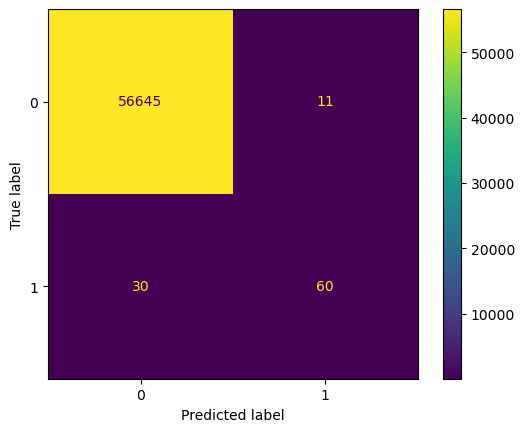

In [34]:
matrix = confusion_matrix(y_test, y_predict)
dis = ConfusionMatrixDisplay(matrix)
dis.plot()
plt.show()

In [35]:
report_4 = classification_report(y_test ,y_predict)
# Print the classification report
print(report_4)
f1_logistic = metrics.f1_score(y_test, y_predict, average='weighted')
jaccard_logistic= jaccard_score(y_test, y_predict,pos_label=0)
print("F1_score : ",f1_logistic)
print('jaccard_score',jaccard_logistic)
print('log_loss',log_loss(y_test, y_predict_prob))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.85      0.67      0.75        90

    accuracy                           1.00     56746
   macro avg       0.92      0.83      0.87     56746
weighted avg       1.00      1.00      1.00     56746

F1_score :  0.9992349096355175
jaccard_score 0.9992767173552553
log_loss 0.004592783691666403
